# [Bacterial Colony Growth](@id Bacteries)

In this example, we are going to create a bacterial model and grow a colony using it.

 - The implementation of the force interaction dynamics is the one presented by [Volfson et al. (2008)](https://www.pnas.org/doi/abs/10.1073/pnas.0706805105)
 - We use GPU accelerated dynamics

As described in other models, it is advised that the models are constructed by parts to avoid having to find bugs in a very complex system. Hence, we will split the model in two parts:

 - Forces model
 - Growth model

## Load the packages

In [1]:
using Base.Threads
println("Usando ", nthreads(), " threads 😎")

Usando 32 threads 😎


In [2]:
import Pkg

# Activa el entorno del proyecto
Pkg.activate("../")

# Pkg.rm("GLMakie")

# Resuelve y asegura dependencias
Pkg.resolve()
Pkg.instantiate()

# Evita errores de versiones incompatibles forzando actualización
# Pkg.update(["CairoMakie", "Revise", "CUDA", "Distributions"])

# Carga los paquetes de forma ordenada
using Revise
using CellBasedModels
using CUDA
using Distributions
using CairoMakie
using JSON

# Importa funciones específicas después
import CairoMakie: Point3f, Cylinder, Sphere, NoShading

CairoMakie.activate!()



  Activating project at `/data/samanthafs/homes/users/jvicens/ABM_CBM`


  No Changes to `/data/samanthafs/homes/users/jvicens/ABM_CBM/Project.toml`
  No Changes to `/data/samanthafs/homes/users/jvicens/ABM_CBM/Manifest.toml`


Precompiling 

project...


  ✓ libsixel_jll
  ✓ LevyArea


  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ FreeType
  ✓ Libglvnd_jll
  ✓ Packing


  ✓ libass_jll


  ✓ ShaderAbstractions


  ✓ libwebp_jll


  ✓ Sixel


  ✓ FreeTypeAbstraction


  ✓ ExactPredicates


  ✓ MakieCore


  ✓ WebP


  ✓ ArrayInterface → ArrayInterfaceCUDAExt


  ✓ CUDA → SpecialFunctionsExt

  ✓ FFMPEG_jll


  ✓ NLSolversBase


  ✓ SparseDiffTools


  ✓ DiffEqBase → DiffEqBaseDistributionsExt


  ✓ LineSearches


  ✓ SparseDiffTools → SparseDiffToolsPolyesterExt


  ✓ MathTeXEngine


  ✓ DelaunayTriangulation


  ✓ NLsolve


  ✓ SimpleNonlinearSolve → SimpleNonlinearSolveStaticArraysExt


  ✓ KernelDensity


  ✓ Optim


  ✓ JumpProcesses


  ✓ DiffEqCallbacks


  ✓ JumpProcesses → JumpProcessFastBroadcastExt


  ✓ DiffEqNoiseProcess


  ✓ SteadyStateDiffEq


  ✓ Sundials


  ✓ LinearSolve → LinearSolveCUDAExt


  ✓ NonlinearSolve


  ✓ NonlinearSolve → NonlinearSolveNLsolveExt


  ✓ Makie


  ✓ NonlinearSolve → NonlinearSolveBandedMatricesExt


  ✓ CairoMakie


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ BoundaryValueDiffEq


  ✓ BoundaryValueDiffEq → BoundaryValueDiffEqOrdinaryDiffEqExt


  ✓ DifferentialEquations


  ✓ CellBasedModels
  47 dependencies successfully precompiled in 267 seconds. 374 already precompiled.


[ Info: Precompiling CellBasedModels [388cb286-f2b1-4654-a3bb-2e137a39c658]


Precompiling CairoMakie


  ✓ ColorVectorSpace → SpecialFunctionsExt


  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ IntervalArithmetic → IntervalArithmeticForwardDiffExt


  ✓ StatsFuns → StatsFunsChainRulesCoreExt


  ✓ Distributions → DistributionsChainRulesCoreExt


  ✓ KernelDensity


  ✓ Makie


  ✓ CairoMakie
  8 dependencies successfully precompiled in 120 seconds. 242 already precompiled.


[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


┌ Warning: Module Distributions with build ID fafbfcfd-7087-a091-001d-7d0cef294433 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0].


Precompiling 

Makie


  ✓ libsixel_jll


  ✓ XSLT_jll


  ✓ Sixel


  ✓ PNGFiles


  ✓ Libglvnd_jll


  ✓ libwebp_jll


  ✓ Cairo_jll


  ✓ WebP


  ✓ HarfBuzz_jll


  ✓ libass_jll


  ✓ GridLayoutBase


  ✓ FFMPEG_jll


  ✓ Makie
  13 dependencies successfully precompiled in 97 seconds. 233 already precompiled.
[ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]


┌ Warning: Module Distributions with build ID fafbfcfd-7087-a091-001d-7d0cef294433 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a].


Precompiling SpecialFunctionsExt


  ✓ KernelAbstractions → EnzymeExt


  ✓ CUDA → ChainRulesCoreExt
  2 dependencies successfully precompiled in 56 seconds. 127 already precompiled.
[ Info: Precompiling SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b]


┌ Warning: Module SpecialFunctions with build ID fafbfcfd-d68c-4f6c-001d-7d0d1a696e18 is missing from the cache.
│ This may mean SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948


[ Info: Skipping precompilation since __precompile__(false). Importing SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b].


Precompiling DiffEqBaseUnitfulExt


  ✓ DiffEqBase → DiffEqBaseUnitfulExt


  ✓ DiffEqBase → DiffEqBaseChainRulesCoreExt
  2 dependencies successfully precompiled in 6 seconds. 169 already precompiled.
[ Info: Precompiling DiffEqBaseUnitfulExt [aeb06bb4-539b-5a1b-8332-034ed9f8ca66]


┌ Warning: Module DiffEqBase with build ID fafbfcfd-9d4c-30f7-001d-7d12bba96190 is missing from the cache.
│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing DiffEqBaseUnitfulExt [aeb06bb4-539b-5a1b-8332-034ed9f8ca66].


[ Info: Precompiling KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]


┌ Warning: Module Distributions with build ID fafbfcfd-7087-a091-001d-7d0cef294433 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b].


[ Info: Precompiling ChainRulesCoreExt [eae2faf6-b232-58cb-a410-7764fda2830c]


┌ Warning: Module CUDA with build ID fafbfcfd-40bd-0826-001d-7cff852da4fd is missing from the cache.
│ This may mean CUDA [052768ef-5323-5732-b1bb-66c8b64840ba] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing ChainRulesCoreExt [eae2faf6-b232-58cb-a410-7764fda2830c].


[ Info: Precompiling SpecialFunctionsChainRulesCoreExt [9eb7bdd4-e44c-55fc-b9cc-1a32cb715188]


┌ Warning: Module SpecialFunctions with build ID fafbfcfd-d68c-4f6c-001d-7d0d1a696e18 is missing from the cache.
│ This may mean SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing SpecialFunctionsChainRulesCoreExt [9eb7bdd4-e44c-55fc-b9cc-1a32cb715188].


[ Info: Precompiling StatsFunsChainRulesCoreExt [d41313fe-2684-5453-9fef-703f5fa397f4]


Error in Timer:
[ Info: Skipping precompilation since __precompile__(false). Importing StatsFunsChainRulesCoreExt [d41313fe-2684-5453-9fef-703f5fa397f4].
ZMQ.StateError("Interrupted system call")
Stacktrace:
  [1] _send(socket::ZMQ.Socket, zmsg::Base.RefValue{ZMQ.lib.zmq_msg_t}, more::Bool)
    @ ZMQ ~/.julia/packages/ZMQ/Lz9O7/src/comm.jl:9
  [2] send(socket::ZMQ.Socket, data::String; more::Bool)
    @ ZMQ ~/.julia/packages/ZMQ/Lz9O7/src/comm.jl:40
  [3] send
    @ ~/.julia/packages/ZMQ/Lz9O7/src/comm.jl:37 [inlined]
  [4] send_ipython(socket::ZMQ.Socket, m::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/XF6bn/src/msg.jl:60
  [5] macro expansion
    @ ~/.julia/packages/IJulia/XF6bn/src/stdio.jl:169 [inlined]
  [6] macro expansion
    @ ./lock.jl:267 [inlined]
  [7] send_stream(name::String)
    @ IJulia ~/.julia/packages/IJulia/XF6bn/src/stdio.jl:149
  [8] send_stdio(name::String)
    @ IJulia ~/.julia/packages/IJulia/XF6bn/src/stdio.jl:126
  [9] send_stderr
    @ ~/.julia/packages

[ Info: Skipping precompilation since __precompile__(false). Importing PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883].
Precompiling Cairo
  ✓ XSLT_jll
  ✓ Pango_jll
  ✓ Cairo
  3 dependencies successfully precompiled in 15 seconds. 44 already precompiled.
[ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
┌ Warning: Module Cairo_jll with build ID fafbfcfd-7ad3-247c-001d-7da3103fb872 is missing from the cache.
│ This may mean Cairo_jll [83423d85-b0ee-5818-9007-b63ccbeb887a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing Cairo [159f3aea-2a34-519c-b102-8c37f9878175].
[ Info: Precompiling Pango_jll [36c8627f-9965-5494-a995-c6b170f724f3]
┌ Warning: Module Cairo_jll with build ID fafbfcfd-7ad3-247c-001d-7da3103fb872 is missing from the cache.
│ This may mean Cairo_jll [83423d85-b0ee-5818-9007-b63ccbeb887a] does not support precompilation but is imported by a

## Forces model

We already use the defined forces model that is implemented in CBMModels. This is an exact copy of the rod model that you can find already predefined in `Models/rods.jl`. You can check the `Models` section of the documentation for more details.


In [3]:
rod2D = ABM(2,
    agent = Dict(
            :theta=>Float64,
            :d=>Float64,
            :l=>Float64,
            :fx=>Float64,
            :fy=>Float64,
            :W=>Float64,
            :pressure=>Float64,
            :type=>Int,
        ),    #Local Interaction Parameters

    model = Dict(
            :n=>Int,
            :Ebb=>Float64,
            :Ebg=>Float64,
            :Egg=>Float64,
            :epsbb=>Float64,
            :epsbg=>Float64,
            :epsgg=>Float64,
            :etab=>Float64,
            :etag=>Float64,
        ),        #Global parameters

    agentODE = quote

        fx = 0
        fy = 0
        W = 0
        pressure = 0
        @loopOverNeighbors i2 begin

            #Use the model provided in the documentation
            Fijx, Fijy, Wij = CBMModels.repulsiveForces(x,y,d,l,theta,etab,type, 
                                    x[i2],y[i2],d[i2],l[i2],theta[i2],etag,type[i2], Ebb, Ebg, Egg)

            #Append the repulsive forces
            fx += Fijx
            fy += Fijy
            W += Wij

            #Keep track of preassure in the media
            pressure += sqrt(Fijx^2+Fijy^2)
            #Use the model provided in the documentation
            # Fijx, Fijy, Wij = CBMModels.attractiveForces(x,y,d,l,theta,etab,type, 
                                    # x[i2],y[i2],d[i2],l[i2],theta[i2],etag,type[i2], epsbb, epsbg, epsgg)

            
            
            # #Append the repulsive forces
            # fx += Fijx
            # fy += Fijy
            # W += Wij
            # #Keep track of preassure in the media
            # pressure += sqrt(Fijx^2+Fijy^2)
            
        end

        #Equations
        dt(x) =  fx 
        dt(y) =  fy 
        dt(theta) =  W
    end,

    neighborsAlg=CBMNeighbors.CellLinked(cellEdge=4),
    platform=GPU(),
    agentAlg = CBMIntegrators.Heun()
);


### Initialize a community with two bacteries and check forces

In [4]:
com = Community(rod2D,
            N=30,
            dt=1.,
            simBox = [-10 10;-10 10.],
            );

#Natural units scales
m = 1.E-12 #ng
t = 1/(60*60) # h
d = 1.E-6 #um


com.n=30
com.Ebb=100. *m/(t^2*d)*1.E-3 #kPa
com.Ebg=100. *m/(t^2*d)*1.E-3 #kPa
com.Egg=100. *m/(t^2*d)*1.E-3 #kPa

com.epsbb=3.E8 *m*d/t^2 #Pa um^2
com.epsbg=28. *m*d/t^2 #Pa um^2
com.epsgg=18. *m*d/t^2 #Pa um^2

com.etab=500 *m/(t*d) #Pa h
com.etag=500 *m/(t*d) #Pa h


1.8000000000000003

In [5]:
com.Ebb, com.epsbb, com.etab

([1.296], [0.003887999999999999], [1.8000000000000003])

In [6]:
for i in 1:com.N
    com.theta[i] = rand() * 2π
    com.x[i] = rand()*16-8
    com.y[i] = rand()*16-8
    if i <= com.n[1]  # agentes del 0 al 4 (long rods)
        com.type[i] = 0
        com.l[i] = 3.0
        com.d[i] = 1.0
    else       # agentes del 5 al 9 (puntos o discos)
        com.type[i] = 1
        com.l[i] = 0
        com.d[i] = 0.8
    end
end

In [7]:
evolve!(com,steps=8000,saveEach=100,preallocateAgents=com.N)

In [8]:
function plotMixedAgents2D!(ax, x, y, d, l, angle, type, p; kargs...)
    for (xi, yi, li, di, ai, ti, pi) in zip(x, y, l, d, angle, type, p)


        if ti== 0  # rods
            colorval = pi
            colormap = :inferno
            meshscatter!(ax,
                [xi + li/2 * cos(ai)],
                [yi + li/2 * sin(ai)];
                marker = Sphere(Point3f(0, 0, 0), Float32(1)),
                markersize = [Point3f(di/2, di/2, di/2)],
                color = [colorval],
                colormap = colormap,
                kargs...
            )
            meshscatter!(ax,
                [xi - li/2 * cos(ai)],
                [yi - li/2 * sin(ai)];
                marker = Sphere(Point3f(0, 0, 0), Float32(1)),
                markersize = [Point3f(di/2, di/2, di/2)],
                color = [colorval],
                colormap = colormap,
                kargs...
            )
            meshscatter!(ax,
                [xi],
                [yi];
                marker = Cylinder(Point3f(-.5, 0, 0), Point3f(.5, 0, 0), Float32(1)),
                markersize = [Point3f(li, di/2, di/2)],
                rotation = [ai],
                color = [colorval],
                colormap = colormap,
                kargs...
            )
        else  # puntos
            colorval = RGBf(0, 1, 1)  # rojo puro
            meshscatter!(ax,
                [Point3f(xi, yi, 0.0)];  # ¡usar coordenadas 3D!
                marker = Sphere(Point3f(0, 0, 0), Float32(1)),
                markersize = [Point3f(di/2, di/2, di/2)],  # ¡tamaño real 3D!
                color = [colorval],
                kargs...
            )
        end

    end
    return
end


plotMixedAgents2D! (generic function with 1 method)

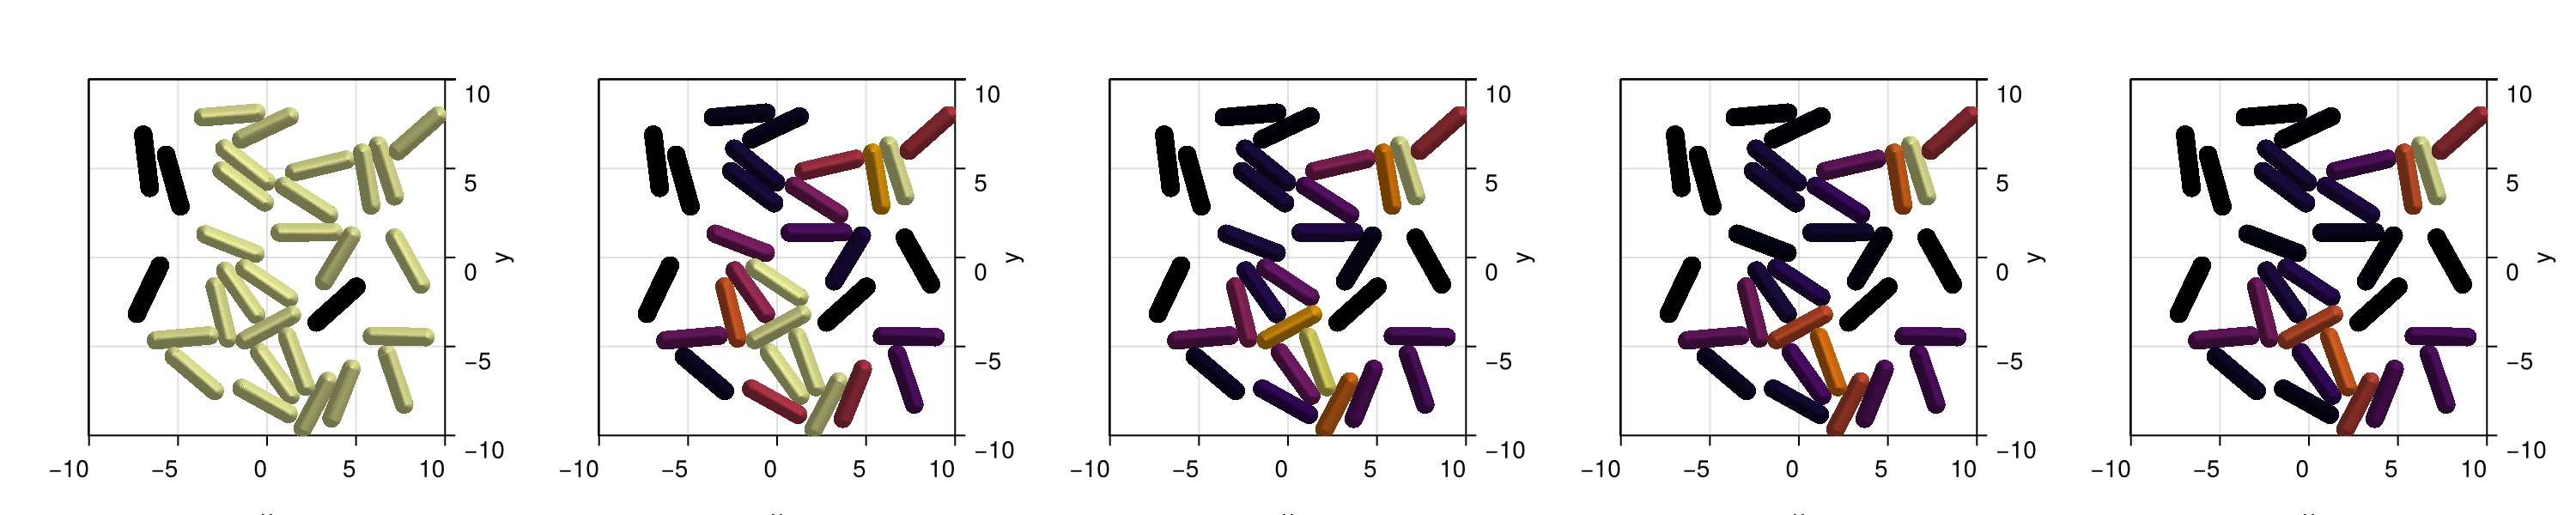

CairoMakie.Screen{IMAGE}


In [9]:
fig = Figure(size=(1500,300))

for (i,j) in enumerate([1:round(Int,length(com)/4):length(com);length(com)])
    ax = Axis3(fig[1,i],
                azimuth=3*π/2,
                elevation=π/2,
                zlabelvisible=false,
                zticklabelsvisible=false,
                zgridvisible=false,
                zspinesvisible=false
            )

    plotMixedAgents2D!(
    ax,
    com[j][:x],
    com[j][:y],
    com[j][:d],
    com[j][:l],
    com[j][:theta],
    com[j][:type],
    com[j][:pressure],
    colorrange = (0, maximum(com.pressure))
)

    xlims!(-10,10)
    ylims!(-10,10)
end

display(fig)

In [10]:
using JSON

function log_community_state(parameters::OrderedDict, t::Int, path::String = "parameters_2.txt")
    # Convert keys to strings so JSON can serialize them
    string_keys = Dict(string(k) => v for (k, v) in parameters)
    # Build entry
    entry = Dict("t" => t, "parameters" => string_keys)
    # Save as a JSON line
    open(path, "a") do io
        println(io, JSON.json(entry))
    end
end


function load_parameters_log(path::String = "parameters_2.txt")
    log = Dict{Int, OrderedDict{Symbol, Any}}()
    for line in eachline(path)
        entry = JSON.parse(line)
        t = entry["t"]
        raw_params = entry["parameters"]
        params = OrderedDict(Symbol(k) => v for (k, v) in raw_params)
        log[t] = params
    end
    times = sort(collect(keys(log)))
    com_array = [log[t] for t in times]
    return com_array, times
end



load_parameters_log (generic function with 2 methods)

In [11]:
steps=8000
saveEach=100
N=100
loadToPlatform!(com,preallocateAgents=N)
open("parameters_2.txt", "w") do f
    # clear file at start
end


for step in 1:steps
    
    step!(com)

    if step % saveEach == 0
        bringFromPlatform!(com)
        if  N - com.N[1] < 2*com.N[1]
            N = 4*com.N[1]
        end
        println("Step ",step, " N: ", com.N[1])
        log_community_state(com.parameters, step)
        loadToPlatform!(com,preallocateAgents=N)
    end
end


Step 100 N: 30


Step 200 N: 30


Step 300 N: 30


Step 400 N: 30


Step 500 N: 30


Step 600 N: 30
Step 700 N: 30


Step 800 N: 30


Step 900 N: 30


Step 1000 N: 30


Step 1100 N: 30
Step 1200 N: 30


Step 1300 N: 30


Step 1400 N: 30
Step 1500 N: 30


Step 1600 N: 30


Step 1700 N: 30


Step 1800 N: 30


Step 1900 N: 30
Step 2000 N: 30


Step 2100 N: 30


Step 2200 N: 30


Step 2300 N: 30
Step 2400 N: 30


Step 2500 N: 30


Step 2600 N: 30


Step 2700 N: 30


Step 2800 N: 30
Step 2900 N: 30


Step 3000 N: 30


Step 3100 N: 30


Step 3200 N: 30


Step 3300 N: 30
Step 3400 N: 30


Step 3500 N: 30


Step 3600 N: 30


Step 3700 N: 30
Step 3800 N: 30


Step 3900 N: 30


Step 4000 N: 30


Step 4100 N: 30


Step 4200 N: 30
Step 4300 N: 30


Step 4400 N: 30


Step 4500 N: 30


Step 4600 N: 30


Step 4700 N: 30
Step 4800 N: 30


Step 4900 N: 30


Step 5000 N: 30


Step 5100 N: 30
Step 5200 N: 30


Step 5300 N: 30


Step 5400 N: 30


Step 5500 N: 30


Step 5600 N: 30
Step 5700 N: 30


Step 5800 N: 30


Step 5900 N: 30


Step 6000 N: 30


Step 6100 N: 30
Step 6200 N: 30


Step 6300 N: 30


Step 6400 N: 30


Step 6500 N: 30
Step 6600 N: 30


Step 6700 N: 30


Step 6800 N: 30


Step 6900 N: 30
Step 7000 N: 30


Step 7100 N: 30


Step 7200 N: 30


Step 7300 N: 30


Step 7400 N: 30


Step 7500 N: 30
Step 7600 N: 30


Step 7700 N: 30


Step 7800 N: 30


Step 7900 N: 30


Step 8000 N: 30


In [12]:
com_,times=load_parameters_log("parameters_2.txt")

(OrderedDict{Symbol, Any}[OrderedDict(:epsbb => Any[0.0038880000356584787], :W => Any[-3.0933080541473146e-9, -5.060489360886322e-9, 1.5361601768404398e-8, 1.2547822336728132e-8, 1.118251180542984e-8, -7.449195926767516e-9, -9.218363850038713e-9, 0.0, -8.96599772204354e-9, 1.0611068967936177e-10  …  1.377414537984123e-8, 0.0, -2.474491012094404e-8, 7.19016979289222e-9, -3.1998987903847365e-9, 0.0, -1.5674736175697035e-8, -8.775177917641486e-9, 0.0, -2.3887487543561292e-9], :fx => Any[-1.4764157896252073e-8, -2.1864805077598248e-8, 5.952293591349189e-8, -4.693957222912104e-9, 1.1887259177001397e-7, -1.1909556008049549e-7, -2.2796035636929446e-7, 0.0, -5.94584648183627e-8, 3.724825781148411e-9  …  3.673603643505885e-9, 0.0, -5.952376724849273e-8, 5.899514654572613e-9, -1.7457193024483786e-8, 0.0, 4.693957222912104e-9, 2.3786024883065693e-7, 0.0, 1.7663751350482926e-8], :x => Any[0.42100971937179565, -0.1386474221944809, -1.2296991348266602, 7.209223747253418, -2.5867884159088135, 2.94156

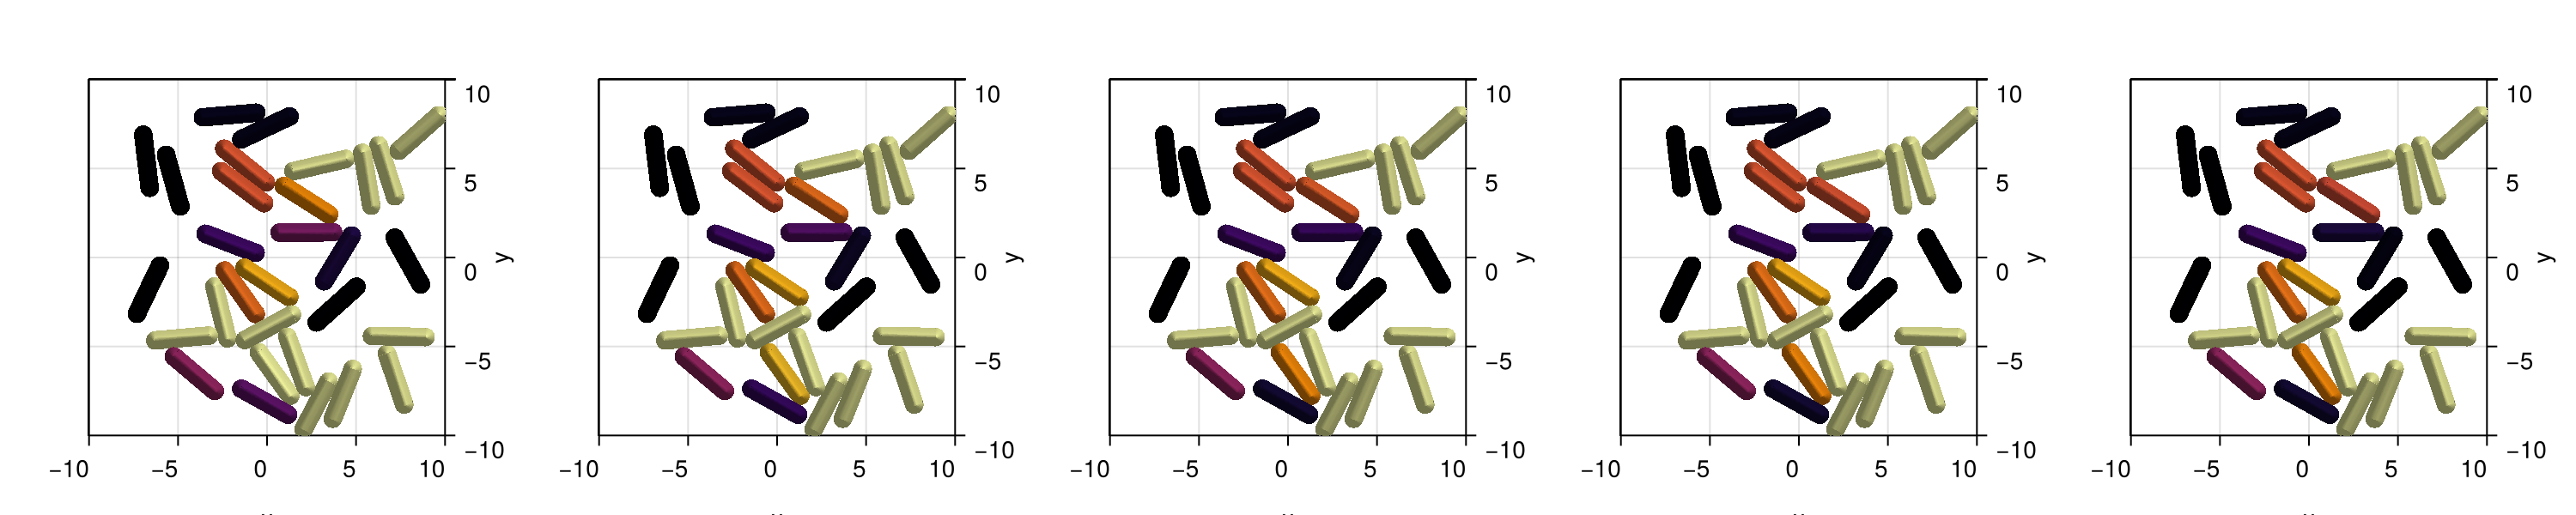

CairoMakie.Screen{IMAGE}


In [13]:
fig = Figure(size=(1500,300))

for (i,j) in enumerate([1:round(Int,length(com_)/4):length(com_);length(com_)])
    ax = Axis3(fig[1,i],
                azimuth=3*π/2,
                elevation=π/2,
                zlabelvisible=false,
                zticklabelsvisible=false,
                zgridvisible=false,
                zspinesvisible=false
            )

    plotMixedAgents2D!(
    ax,
    com_[j][:x],
    com_[j][:y],
    com_[j][:d],
    com_[j][:l],
    com_[j][:theta],
    com_[j][:type],
    com_[j][:pressure],
    colorrange = (0, maximum((p[:pressure][1]) for p in com_))
)

    xlims!(-10,10)
    ylims!(-10,10)
end

display(fig)

## Growth model

We construct over the forces model to add bacterial growth and cell division rules.

In [14]:
rods2dGrowth = ABM(2,
    baseModelInit = [rod2D],

    agent = Dict(
                :lTarget => Float64,
            ),

    model = Dict(
                :growth=>Float64,
                :σlTarget=>Float64,
                :lMax=>Float64,
                :α=>Float64,
                :σ=>Float64,
                :p_half=>Float64,
                :DMedium => Float64,
                :delta => Float64,
                :qrate => Float64, 
            ),
    
    medium = Dict(
        :mm => Float64        #Add a medium parameter
    ),

 
    agentODE = quote
        if type == 0
            dt(l) = l*growth/(1+α*pressure) #linear growth with growth dependent on the pressure over the cell
        end
        
    end,

    agentRule = quote #Bound cells
        #Add division
        if l > lTarget
            ww = CBMDistributions.uniform(-.1,.1)/10000 #To add some random torque at division time
            # ww = 0 #To add some random torque at division time
            #Add a new cell
            @addAgent(
                    x=(l+d)/4*cos(theta)+x,
                    y=(l+d)/4*sin(theta)+y,
                    l=(l-d)/2,
                    W=ww,
                    lTarget = CBMDistributions.uniform(lMax-σlTarget,lMax+σlTarget), #New target length at which the bactery should divide
                    type=0)
            #Add a second cell
            @addAgent(
                    x=-(l+d)/4*cos(theta)+x,
                    y=-(l+d)/4*sin(theta)+y,
                    l=(l-d)/2,
                    lTarget = CBMDistributions.uniform(lMax-σlTarget,lMax+σlTarget), #New target length at which the bactery should divide
                    W=ww,
                    type=0)
            #Remove the old cell
            @removeAgent()
        end
        # Probability of releasing PGA with a saturating function
        pq = 1/(1+α*pressure)
        prelease = σ * mm / (p_half + mm)

        if CBMDistributions.uniform(0, 1) < prelease
            # PGA release!
            # You could mark it, count it, or log it here
            # @info "PGA released at step $(step) by agent ID $(id)"
            aux=CBMDistributions.rand_pm()
            @addAgent(
                    # x=((l+d)*(rand()-1/2)+aux*d/2)*cos(theta)+x,
                    # y=((l+d)*(rand()-1/2)-aux*d/2)*sin(theta)+y,
                    x=(CBMDistributions.uniform(-1,1)*(l+d)/2+aux*d/2)*cos(theta)+x,
                    y=(CBMDistributions.uniform(-1,1)*(l+d)/2-aux*d/2)*sin(theta)+y,
                    l=0,
                    d=0.5,
                    lTarget = CBMDistributions.uniform(lMax-σlTarget,lMax+σlTarget), #New target length at which the bactery should divide
                    type=1)

        end
        if CBMDistributions.uniform(0, 1) < pq
            mm += 1
        end

           

    end,

    #Medium dynamics with dirichlet conditions and a wall that is as oscillating source of material
    mediumODE=quote 
        if @mediumInside()
            dt(mm) = DMedium*(@∂2(1,mm)+@∂2(2,mm)) - delta*mm # we only diffuse in x as the symmetry is in x
            # dt(mm) = DMedium*(@∂2(1,mm)+@∂2(2,mm))-delta*mm# we only diffuse in x as the symmetry is in x
       elseif @mediumBorder(1,-1) #x last
            mm = 0
        elseif @mediumBorder(1,1) #x fist??
            mm = 0 #Oscillatory behaviour
        elseif @mediumBorder(2,1) #y first
            mm = 0
        elseif @mediumBorder(2,-1) #y last
            mm = 0
        end
    end,

    neighborsAlg=CBMNeighbors.CellLinked(cellEdge=4),
    platform=CPU(),
    agentAlg=CBMIntegrators.Heun()
);

## Grow colony from one cell

In [15]:
com = Community(rods2dGrowth,
            N=1,
            dt=1.,
            simBox = [-100 100;-100 100.],
            NMedium=[100,100],
            );

#Natural units scales
m = 1.E-12 #ng
t = 1/(60*60) # h
d = 1.E-6 #um


com.n=30
com.Ebb=20. *m/(t^2*d)*1.E-3 #kPa
com.Ebg=10. *m/(t^2*d)*1.E-3 #kPa
com.Egg=5. *m/(t^2*d)*1.E-3 #kPa

# com.epsbb=5.E7 *m*d/t^2 #Pa um^2
# com.epsbg=18. *m*d/t^2 #Pa um^2
# com.epsgg=18. *m*d/t^2 #Pa um^2

com.etab=500 *m/(t*d) #Pa h
com.etag=500 *m/(t*d) #Pa h

com.DMedium = 1.E-3 /t #um^2/h
com.delta = 1.E-10
com.qrate = 1.E-12 
com.delta = 1.E-3 


com.growth = 0.5 * t
com.lMax = 3.     
com.σlTarget = .2 
com.α = 200
# com.σ = 0
com.σ = 2.E-4
com.type=0

com.d = 1.        
com.l = 2.99      
com.lTarget = 3.  

com.p_half=200.

com.x = 0
com.y = 0
com.theta = 0;

In [16]:
steps=120000
saveEach=10000
N=100 

loadToPlatform!(com,preallocateAgents=N)
open("parameters_2.txt", "w") do f
    # clear file at start
end

for step in 1:steps
    
    step!(com)

    if step % saveEach == 0
        bringFromPlatform!(com)
        if N - com.N[1] <= 0
                println("Step ",step, " N: ", com.N[1], " preallocateAgents: ", N)
                @warn "More agents than preallocateAgents, stopping simulation."
                break
        elseif   N - com.N[1]  < 4*com.N[1]
                N = 15*com.N[1]
        end 
        println("Step ",step, " N: ", com.N[1])
        log_community_state(com.parameters, step)
        loadToPlatform!(com,preallocateAgents=N)
    end
end

Step 10000 N: 4


Step 20000 N: 8


Step 30000 N: 16


Step 40000 N: 37


Step 50000 N: 98


Step 60000 N: 227


Step 70000 N: 558


Step 80000 N: 1364


Step 90000 N: 3909


Step 100000 N: 14331


Step 110000 N: 67522


Step 120000 N: 374304


In [17]:
com_load,times=load_parameters_log("parameters_2.txt")


(OrderedDict{Symbol, Any}[OrderedDict(:epsbb => Any[0.0], :DMedium => Any[3.6], :W => Any[-2.459004893226963e-10, -6.83849896008598e-10, -2.4590048932269636e-10, -6.83849896008598e-10], :fx => Any[-8.786537849434955e-5, -8.821351213184545e-5, 8.786537849434955e-5, 8.821351213184545e-5], :x => Any[-3.165185848579632, 0.874969861615893, -0.8773664898677104, 3.167987992426592], :σlTarget => Any[0.2], :delta => Any[0.001], :theta => Any[-1.1664880369911896e-5, -1.7103506753009505e-5, -1.1664880369911898e-5, -1.7103506753009505e-5], :qrate => Any[1.0e-12], :epsbg => Any[0.0]…), OrderedDict(:epsbb => Any[0.0], :DMedium => Any[3.6], :W => Any[0.0, 0.0, 3.6382632338823466e-5, -3.1601259138652734e-5, 0.0, -1.886121546030567e-5, 6.22045667823267e-5, 0.0], :fx => Any[0.0, 0.0, 2.7545064355650425e-5, 4.8870885716648406e-5, 0.0, -2.784942585003952e-5, -4.8051137280132694e-5, 0.0], :x => Any[-4.3690090195013855, -0.24322049815997315, -1.7535618404557773, 2.4193515051296175, 4.354631640313264, -2.402

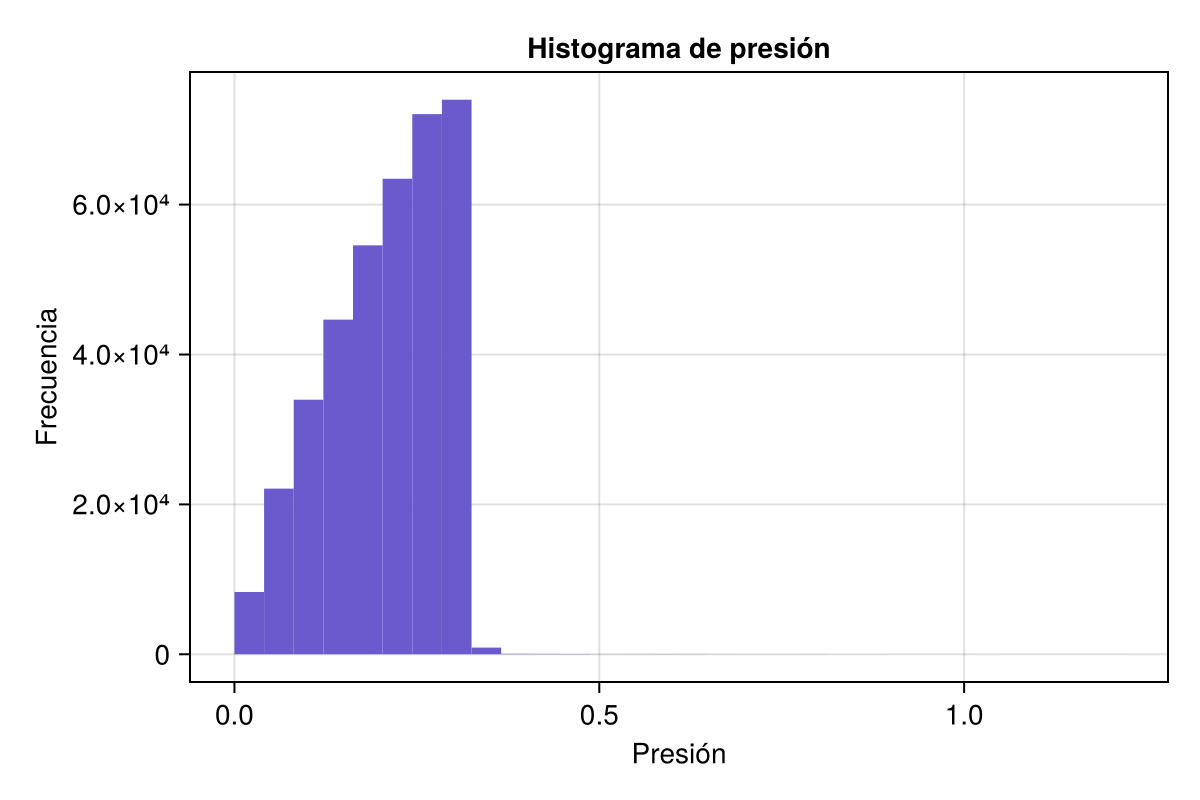

In [18]:
# Elegimos un frame, por ejemplo el último
p = com_load[end][:pressure]

# Creamos la figura y el eje
fig = Figure(size = (600, 400))
ax = Axis(fig[1, 1]; xlabel = "Presión", ylabel = "Frecuencia", title = "Histograma de presión")

# Dibujamos el histograma
hist!(ax, p; bins = 30, color = :slateblue)

fig  # Esto muestra la figura en una ventana interactiva

In [19]:
 maximum(maximum(p -> maximum(p[:mm]), com_load))

1752.0230199642172

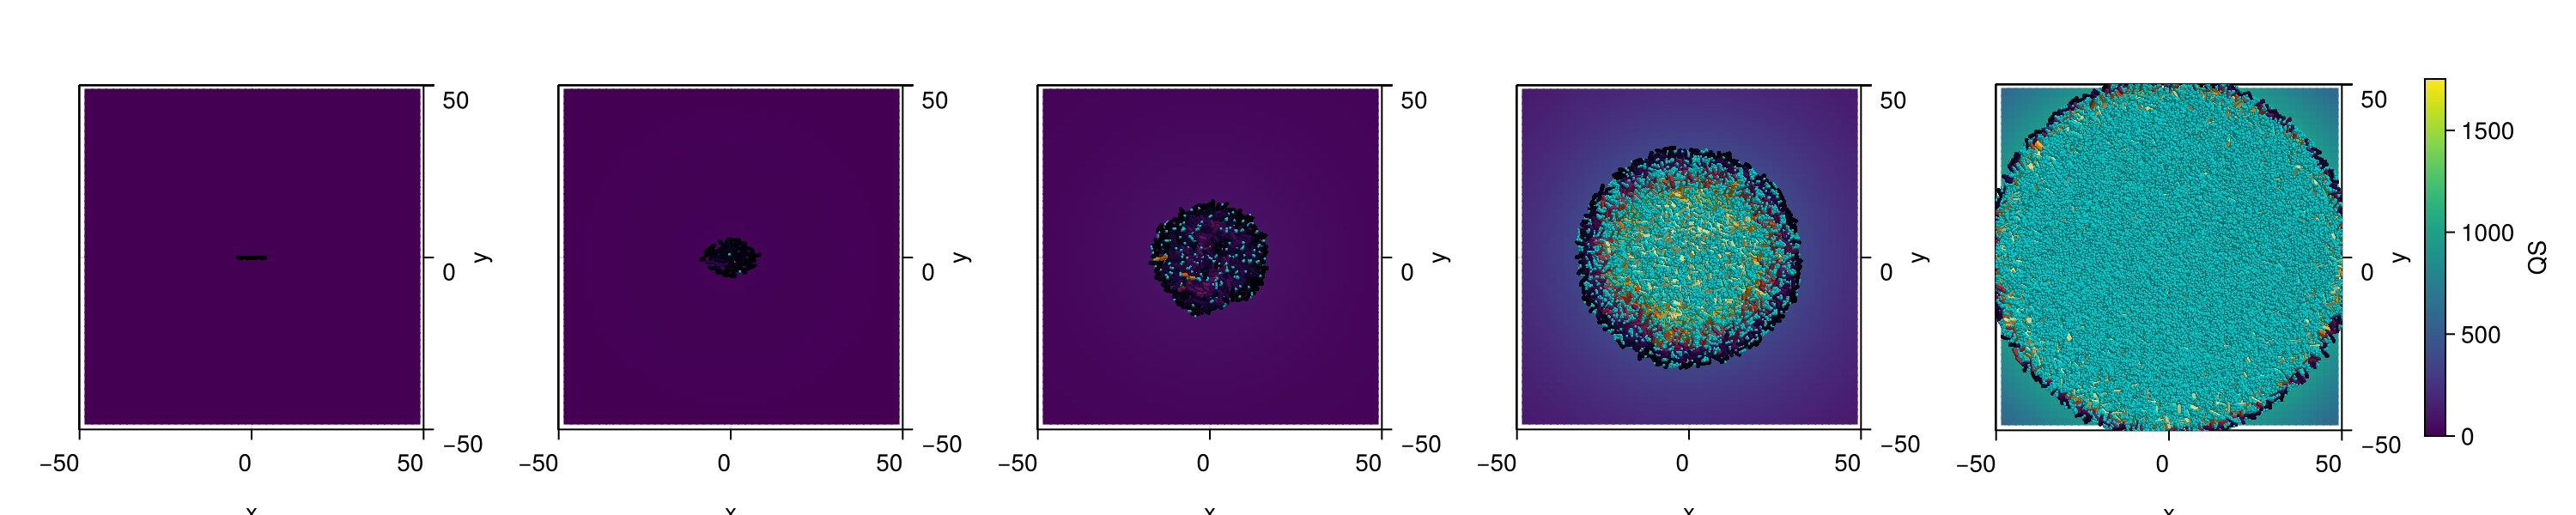

CairoMakie.Screen{IMAGE}


In [20]:
# Colormap común y colorrange fijo
colormap = :viridis
colorrange = (0.0,  maximum(maximum(p -> maximum(p[:mm]), com_load)))



fig = Figure(size=(1500,300))

js = [1:round(Int, length(com_load)/4):length(com_load); length(com_load)]

for (i,j) in enumerate(js)
    ax = Axis3(fig[1,i],
                azimuth=3*π/2,
                elevation=π/2,
                zlabelvisible=false,
                zticklabelsvisible=false,
                zgridvisible=false,
                zspinesvisible=false
            )
    m = heatmap!(ax,
                range(com.simBox[1,1],com.simBox[1,2],length=size(com.mm)[1]),
                range(com.simBox[2,1],com.simBox[2,2],length=size(com.mm)[1]),
                Float64.(hcat(com_load[j][:mm]...)),
                colormap = colormap,
                colorrange = colorrange
            )
    

    plotMixedAgents2D!(
    ax,
    com_load[j][:x],
    com_load[j][:y],
    com_load[j][:d],
    com_load[j][:l],
    com_load[j][:theta],
    com_load[j][:type],
    com_load[j][:pressure],
    colorrange = (0, 0.03)
    )

    xlims!(-50,50)
    ylims!(-50,50)
end

# Añadir colorbar común al final
Colorbar(fig[1, length(js) + 1],
    colormap = colormap,
    colorrange = colorrange,
    label = "QS"
)

display(fig)

In [21]:
colorrange = (0.0,  maximum(maximum(p -> maximum(p[:mm]), com_load)))


(0.0, 1752.0230199642172)

In [22]:
com_load[end][:mm] #Last medium state

100-element Vector{Any}:
 Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 Any[0.0, 0.7237707613576334, 1.447939557925513, 2.1728978306845574, 2.899023824729634, 3.6266759736831067, 4.356186265525413, 5.087853587958964, 5.821937055104509, 6.558649321912672  …  6.652550762617314, 5.9056603858028245, 5.161299227187013, 4.419272974213684, 3.6793385072050344, 2.9412109114613028, 2.204570483141158, 1.4690697199047662, 0.7343402927668282, 0.0]
 Any[0.0, 1.4480058407253835, 2.8968148442678086, 4.347216985100794, 5.799975845202211, 7.255815380137929, 8.71540664512953, 10.179354476404525, 11.648184130512002, 13.122327893481692  …  13.310381878930365, 11.815847636960774, 10.326430541976126, 8.841734746856764, 7.361266724211855, 5.884449313768042, 4.4106357510053815, 2.939123660023404, 1.4691690045742718, 0.0]
 Any[0.0, 2.173163038142333, 4.347548560726849, 6.524359270910563, 8.704758283178572, 10.88984926653919, 13.080656520554099, 15.27

In [23]:
com_load[1][:delta],
com_load[1][:qrate]

(Any[0.001], Any[1.0e-12])

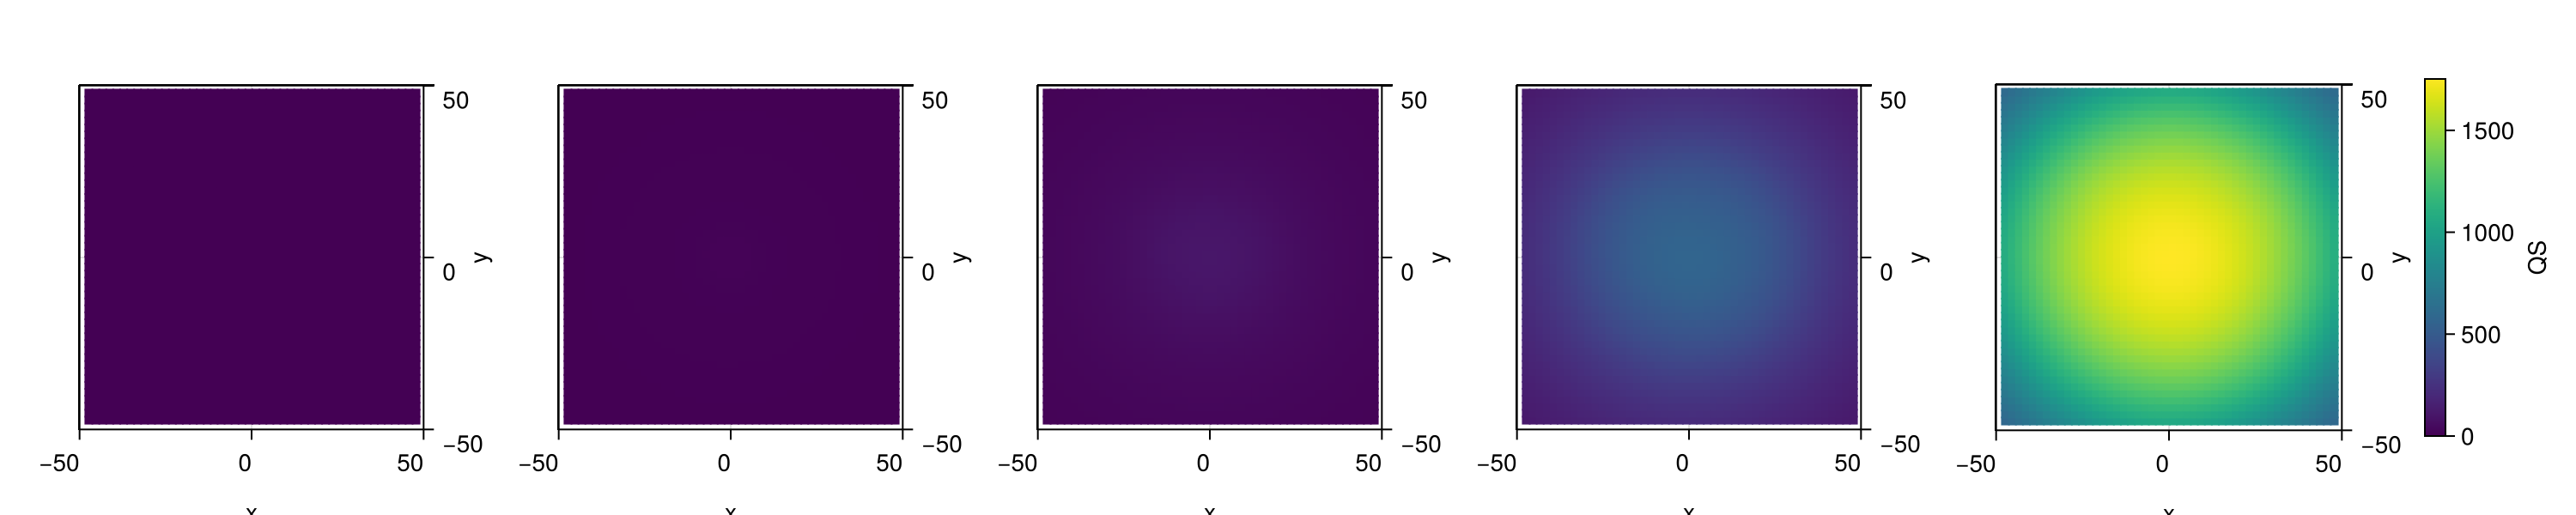

CairoMakie.Screen{IMAGE}


In [24]:
# Colormap común y colorrange fijo
colormap = :viridis
colorrange = (0.0,  maximum(maximum(p -> maximum(p[:mm]), com_load)))



fig = Figure(size=(1500,300))

js = [1:round(Int, length(com_load)/4):length(com_load); length(com_load)]

for (i,j) in enumerate(js)
    ax = Axis3(fig[1,i],
                azimuth=3*π/2,
                elevation=π/2,
                zlabelvisible=false,
                zticklabelsvisible=false,
                zgridvisible=false,
                zspinesvisible=false
            )
    m = heatmap!(ax,
                range(com.simBox[1,1],com.simBox[1,2],length=size(com.mm)[1]),
                range(com.simBox[2,1],com.simBox[2,2],length=size(com.mm)[1]),
                Float64.(hcat(com_load[j][:mm]...)),
                colormap = colormap,
                colorrange = colorrange
            )
    

    # plotMixedAgents2D!(
    # ax,
    # com_load[j][:x],
    # com_load[j][:y],
    # com_load[j][:d],
    # com_load[j][:l],
    # com_load[j][:theta],
    # com_load[j][:type],
    # com_load[j][:pressure],
    # colorrange = (0, 0.03)
    # )

    xlims!(-50,50)
    ylims!(-50,50)
end

# Añadir colorbar común al final
Colorbar(fig[1, length(js) + 1],
    colormap = colormap,
    colorrange = colorrange,
    label = "QS"
)

display(fig)

In [25]:

# Configuración general
colormap = :viridis
colorrange = (0.0, maximum(com.mm))

# Crear figura y ejes
fig = Figure(size = (800, 600))
grid = fig[1, 1] = GridLayout()
ax = Axis(grid[1, 1]; aspect = DataAspect())
Colorbar(grid[1, 2], colormap=colormap, colorrange=colorrange, label="QS")  # una vez



Makie.record(fig, "bacterias_video_pressure_qs_proves.mp4", 1:length(com_load); framerate = 15) do j
 
    Makie.empty!(ax)
    # Preparar heatmap observable para actualizar luego
    x = range(com.simBox[1,1], com.simBox[1,2], length=size(com.mm)[1])
    y = range(com.simBox[2,1], com.simBox[2,2], length=size(com.mm)[2])
    z = copy(hcat(com_load[j][:mm]...))  # inicializa con primer frame

    hm = heatmap!(ax, x, y, z; colormap=colormap, colorrange=colorrange)

    plotMixedAgents2D!(
        ax,
        com_load[j][:x],
        com_load[j][:y],
        com_load[j][:d],
        com_load[j][:l],
        com_load[j][:theta],
        com_load[j][:type],
        com_load[j][:pressure],
        colorrange = (0, 0.03)
    )


    xlims!(ax, -50, 50)
    ylims!(ax, -50, 50)
end


"bacterias_video_pressure_qs_proves.mp4"

In [26]:


# Configuración general
colormap = :viridis
colorrange = (0.0, maximum(com.mm))

# Crear figura y ejes
fig = Figure(size = (800, 600))
grid = fig[1, 1] = GridLayout()
ax = Axis(grid[1, 1]; aspect = DataAspect())
Colorbar(grid[1, 2], colormap=colormap, colorrange=colorrange, label="QS")  # una vez



Makie.record(fig, "bacterias_video_pressure_qs_2_proves.mp4", 1:length(com_load); framerate = 15) do j
 
    Makie.empty!(ax)
    # Preparar heatmap observable para actualizar luego
    x = range(com.simBox[1,1], com.simBox[1,2], length=size(com.mm)[1])
    y = range(com.simBox[2,1], com.simBox[2,2], length=size(com.mm)[2])
    z = copy(hcat(com_load[j][:mm]...))  # inicializa con primer frame

    hm = heatmap!(ax, x, y, z; colormap=colormap, colorrange=colorrange)

    # plotMixedAgents2D!(
    #     ax,
    #     com_load[j][:x],
    #     com_load[j][:y],
    #     com_load[j][:d],
    #     com_load[j][:l],
    #     com_load[j][:theta],
    #     com_load[j][:type],
    #     com_load[j][:pressure],
    #     colorrange = (0, 0.03)
    # )


    xlims!(ax, -50, 50)
    ylims!(ax, -50, 50)
end


"bacterias_video_pressure_qs_2_proves.mp4"